<a href="https://colab.research.google.com/github/sleter/devmeetings_datascience/blob/master/notebooks/DM_Data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dane, a uczenie maszynowe

In [1]:
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

--2019-11-12 19:41:39--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2019-11-12 19:41:40 (15.3 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
import pandas as pd

housing_df = pd.read_csv("/content/housing.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Poszukiwanie korelacji

Ponieważ nasz zbiór danych nie jest duży można z wyliczyć współczynnik korelacji liniowej (inaczje współczynnik korelacji Pearsona) pomiędzy każda parą wartości.

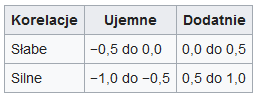

Im bliżej wartości 0 tym mniejsza zależność liniowa pomiędzy cechami.

Obliczanie korelacji liniowej: https://youtu.be/2-VEwB8n7Fo

In [3]:
corr_matrix = housing_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Sprawdzenie stopnia korelacji mediany cen mieszkań z każydm atrybutem.

In [4]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Żeby sprawdzić korelację pomiędy atrybutami możemy użyż też funkcji *scatter_matrix* wbudowanej w bibliotekę Pandas.

Generuje ona  wykres każdego atrybutu numerycznego do każdego atrubutu numerycznego. Mozemy więc przewidzieć, że dla naszego przypadku będzie to ponad 100 wykresów więc ograniczymy się tylko do kilku atrybutów.

[]

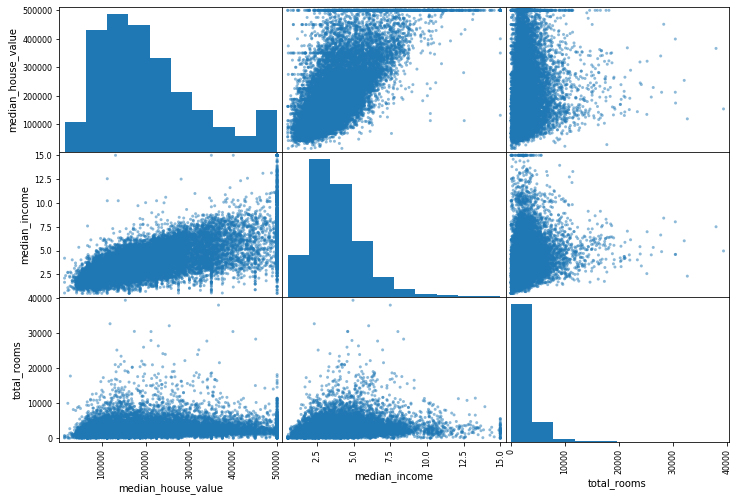

In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["median_house_value", "median_income", "total_rooms"]

scatter_matrix(housing_df[attributes], figsize=(12,8))
plt.plot()

Z obserwacji wynika, że atrybutem z najsilniejszą zależność w stosunku do miediany cen mieszkań jest mediana dochodów.

### Oczyszczanie danych

W zbiorze danych *housing.csv* znajduje się atrybut total_bedrooms, który jak wcześniej zauważyliśmy nie posiada wszystkich wartości.

Taki problem trzeba wyeliminować przed użyciem danych w algorytmach uczenia maszynowego.

Możemy zrobić to na trzy sposoby:

In [6]:
# Pozbycie się wierszy zawierających brakujące dane
housing_df.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Pozbycie się całego atrybutu/kolumny
housing_df.drop("total_bedrooms", axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [8]:
# Wypełnienie danych odpowiedniaą wartością np. medianą, średnią czy zerami
mean = housing_df["total_bedrooms"].mean()
h_df = housing_df.copy()
h_df["total_bedrooms"] = h_df["total_bedrooms"].fillna(mean)
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


SimpleImputer jest narzędziem służącym do automatycznego zajmowania się brakującymi wartościami liczbowymi. Skorzystamy z jego implementacji w bibliotece Scikit-Learn.

Żeby go jednak użyć najpierw musimy pozbyć się (albo zamienić na wartości liczbowe) atrybuty kategoryczne.

In [9]:
from sklearn.impute import SimpleImputer

# Zastosować możemy różne strategie: mean, median lub most_frequent
imputer = SimpleImputer(strategy="mean")

housing_num = housing_df.drop("ocean_proximity", axis=1)

housing_np = imputer.fit_transform(housing_num)
housing_num = pd.DataFrame(housing_np, columns=housing_num.columns)
housing_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


### Radzenie sobie z tekstem i atrybutami kategorycznymi

Wiele algorytmów nie radzi sobie z atrybutami kategorycznymi. Dlatego też trzeba je często zastąpić wartościami liczbowymi.

In [10]:
list(housing_df['ocean_proximity'].unique())

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

##### Przydzielanie tekstowi etykiet

*   zmienne kategoryczne zawierają mało miejsca na dysku
*   mają jednak narzucony porządek



In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_encoded = le.fit_transform(["dog", "dog", "bird", "cat"])
print(cat_encoded)

[2 2 0 1]


##### One hot encoding

*   przewagą nad etykietowaniem tekstu jest binarny wynik, nie ma więc narzuconego porządku
*   problemem jest, że wszystko znajduje się w ortogonalnej przestrzeni wektorowej i jeśli atrybut kategoryczny posiada zbyt wiele unikalnych wartości to może to spowodować naprawdę duży wzrost nowych atrybutów (problem wymiarowości)



In [12]:
cat_oh_encoded = pd.get_dummies(pd.Series(["dog", "dog", "bird", "cat"]))
print(cat_oh_encoded)

   bird  cat  dog
0     0    0    1
1     0    0    1
2     1    0    0
3     0    1    0


Inne metody:


*   Feature Hashing - używając funkcji hashującej
*   Word Embedding - mapując na wektory liczb



### Skalowanie cech

Część algorytmów uczenia maszynowego kiepsko radzi sobie z atrybutami numerycznymi w różnych zakresach skali. Dlatego też wiele wbudowanych algorytmów w popularnych bibliotekach do ML posiada mechanizm skalowania cech.

Możemy też zastosować go sami gdy nie jesteśmy pewnie czy algorytm zrobi to za nas automatycznie czy nie. 

Najczęściej stosowane są dwa rodzaje skalowania wszystkich atrybutów:
   * skalowanie min-max (ang. min-max scaling) lub normalizacja
   * standaryzacja (ang. standarization)
  



MinMaxScaler w Scikit-Learn




In [13]:
from sklearn.preprocessing import MinMaxScaler

data = [[1,1],
        [2,3],
        [3,100]]

mm_scaler = MinMaxScaler()

mm_scaler.fit_transform(data)

array([[0.        , 0.        ],
       [0.5       , 0.02020202],
       [1.        , 1.        ]])

StandardScaler w Scikit-Learn

In [14]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit_transform(data)

array([[-1.22474487, -0.72863911],
       [ 0.        , -0.68535362],
       [ 1.22474487,  1.41399274]])

### Zadania
1.   Zaimplementuj nową kolumnę zawierającą stosunek sypialni do pokoi i sprawdź stopień korelacji każdego atrybutu z medianą cen mieszkań. Wybierz 3 najbardziej zależne od niej atrybuty. Czy jest wśród nich nowo dodana cecha?
2.   Przetestuj funkcję *scatter_matrix* z biblioteki Pandas dla innych atrybutów niż przykładowe i spróbuj na podstawie wygenerowanych wykresów ocenić zależność pomiędzy  tymi atrybutami.
3. Dla zbioru danych housing.csv zastąp kolumnę kategoryczną wartościami liczbowymi używając LabelEncoder i alternatywnie OneHotEncoder. Przy użyciu OHE pamiętaj o usunięciu kolumny z pierowtnych danych i połączeniu wyniku z użyciem funkcji *join* dostępnej w bibliotece Pandas.
4. Używając standaryzacji poddaj skalowaniu cech wynik zadania 3 (czyli połączony zbiór danych housing.csv z wynikiami OHE).




In [0]:
# WRITE YOUR CODE HERE